In [1]:
import keras
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import cv2

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(60, 50, 3)))
model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(5000))
model.add(Activation('relu'))
model.add(Dense(10))


In [3]:
annFile = 'annotations/instances_val2017.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


In [4]:
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

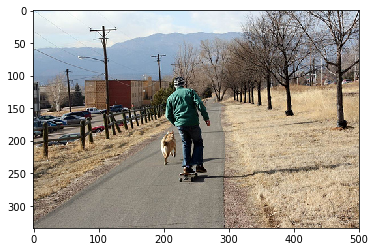

In [5]:
I = io.imread(img['coco_url'])
plt.imshow(I)
plt.show()

In [6]:
I = cv2.resize(I, (50,60))

In [7]:
model.predict(np.array([I]))

array([[ -16.116858 ,   84.96681  , -148.44753  ,  -12.636889 ,
          51.086643 ,  -13.1591015,   16.944008 ,   68.3139   ,
         -40.756042 ,  103.8966   ]], dtype=float32)